In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cross_validation import train_test_split


In [229]:
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [230]:
btc_df=pd.read_csv('final_btc.csv')

In [231]:
#btc_df.info()

In [232]:
btc_df=btc_df[btc_df["BCHAIN/MKPRU"]>0]

In [234]:
btc_df['Date']=pd.DatetimeIndex(btc_df['Date'])

In [235]:
btc_df.set_index('Date', inplace=True)

In [245]:
# Train the Scaler with training data and smooth data

In [246]:
btc_x=btc_df.drop('BCHAIN/MKPRU', axis=1)

# Linear regression to detect Multicolinearity 

In [300]:
X = btc_df.drop('BCHAIN/MKPRU', axis=1).values
y = btc_df['BCHAIN/MKPRU'].values

In [301]:
#Splitting the data into training and test sets

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 100)

In [302]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(2009, 30) (2009,)
(862, 30) (862,)


In [303]:
import statsmodels.api as sma
X_train = sma.add_constant(x_train) ## let's add an intercept (beta_0) to our model
X_test = sma.add_constant(x_test) 

In [304]:
import statsmodels.formula.api as sm
lm = sm.OLS(y_train,X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.210e+06
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        19:08:57   Log-Likelihood:                -8946.4
No. Observations:                2009   AIC:                         1.795e+04
Df Residuals:                    1979   BIC:                         1.812e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        398.2025     77.178      5.160      0.000     246.843     549.562
x1           -57.7709      8.521     -6.779      0.000     -74.483     -41.059
x2            76.9152     13.459      5.715      0.000      50.519     103.311
x3            -0.2957      0.165     -1.790      0.074      -0.620       0.028
x4         -8.734e-06   1.29e-06     -6.791      0.000   -1.13e-05   -6.21e-06
x5          5.668e-08   1.64e-10    346.461      0.000    5.64e-08     5.7e-08
x6            -0.0359      0.014     -2.544      0.011      -0.064      -0.008
x7         -1.748e-05   1.73e-06    -10.130      0.000   -2.09e-05   -1.41e-05
x8            -0.0002   5.89e-05     -3.144      0.002      -0.000   -6.96e-05
x9          7.659e-06   5.18e-07     14.777      0.000    6.64e-06    8.68e-06
x10         8.561e-05   5.15e-05      1.662      0.097   -1.54e-05       0.000
x11            0.0001   2.33e-05      6.232      0.000    9.95e-05       0.000
x12            0.0154      0.005      3.418      0.001       0.007       0.024
x13         2.542e-07   2.37e-07      1.071      0.284   -2.11e-07     7.2e-07
x14         6.229e-07   1.78e-06      0.350      0.726   -2.86e-06    4.11e-06
x15         1.708e-08   3.58e-09      4.772      0.000    1.01e-08    2.41e-08
x16         5.028e-09   3.34e-09      1.504      0.133   -1.53e-09    1.16e-08
x17            0.0572      0.069      0.827      0.408      -0.078       0.193
x18            2.1778      0.081     26.831      0.000       2.019       2.337
x19        -1.736e-05   1.05e-06    -16.521      0.000   -1.94e-05   -1.53e-05
x20         1.606e-05   1.36e-06     11.766      0.000    1.34e-05    1.87e-05
x21            1.2311      0.187      6.596      0.000       0.865       1.597
x22           -0.0099      0.001    -10.917      0.000      -0.012      -0.008
x23           10.9374      8.175      1.338      0.181      -5.094      26.969
x24        -1.292e-06   1.77e-06     -0.728      0.467   -4.77e-06    2.19e-06
x25        -3.119e-05   3.53e-06     -8.826      0.000   -3.81e-05   -2.43e-05
x26            0.0002   3.61e-05      5.984      0.000       0.000       0.000
x27         1.137e-10   8.48e-12     13.400      0.000     9.7e-11     1.3e-10
x28           -0.0166      0.008     -2.064      0.039      -0.032      -0.001
x29           -0.0299      0.012     -2.457      0.014      -0.054      -0.006
x30           -0.3364      0.165     -2.038      0.042      -0.660      -0.013
==============================================================================
Omnibus:                     2402.764   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1643151.964
Skew:                          -5.499   Prob(JB):                         0.00
Kurtosis:                     142.673   Cond. No.                     1.56e+14
==

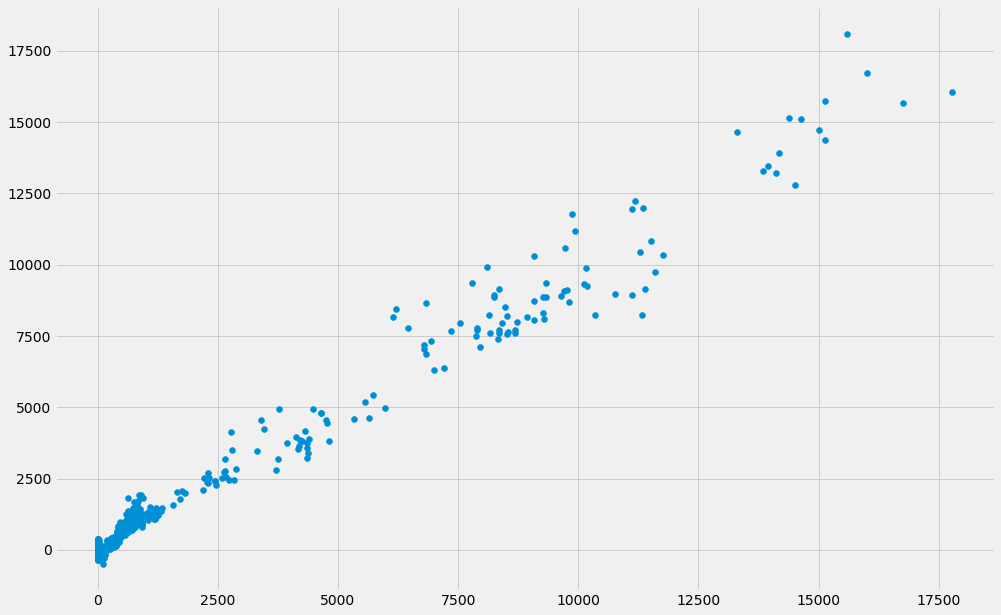

In [306]:
fig, ax=plt.subplots(figsize=(15,10))
plt.scatter(y_test, y_pred)

In [327]:
vif=[variance_inflation_factor(X_train, j) for j in range(X_train.shape[1])]
vif = pd.concat([pd.DataFrame(btc_df.columns),pd.DataFrame(np.transpose(vif_c))], axis = 1)
vif

c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,0,0
0,USD/CNY Close,3.125725
1,EUR/USD Close,8.271243
2,USD/JPY Close,21.853399
3,BCHAIN/TOTBC,93.524057
4,BCHAIN/MKTCP,264.942702
5,BCHAIN/TRFEE,12.307596
6,BCHAIN/TRFUS,25.286506
7,BCHAIN/NTRAN,167.791065
8,BCHAIN/NTRAT,10978.053000
9,BCHAIN/NTREP,129.275910


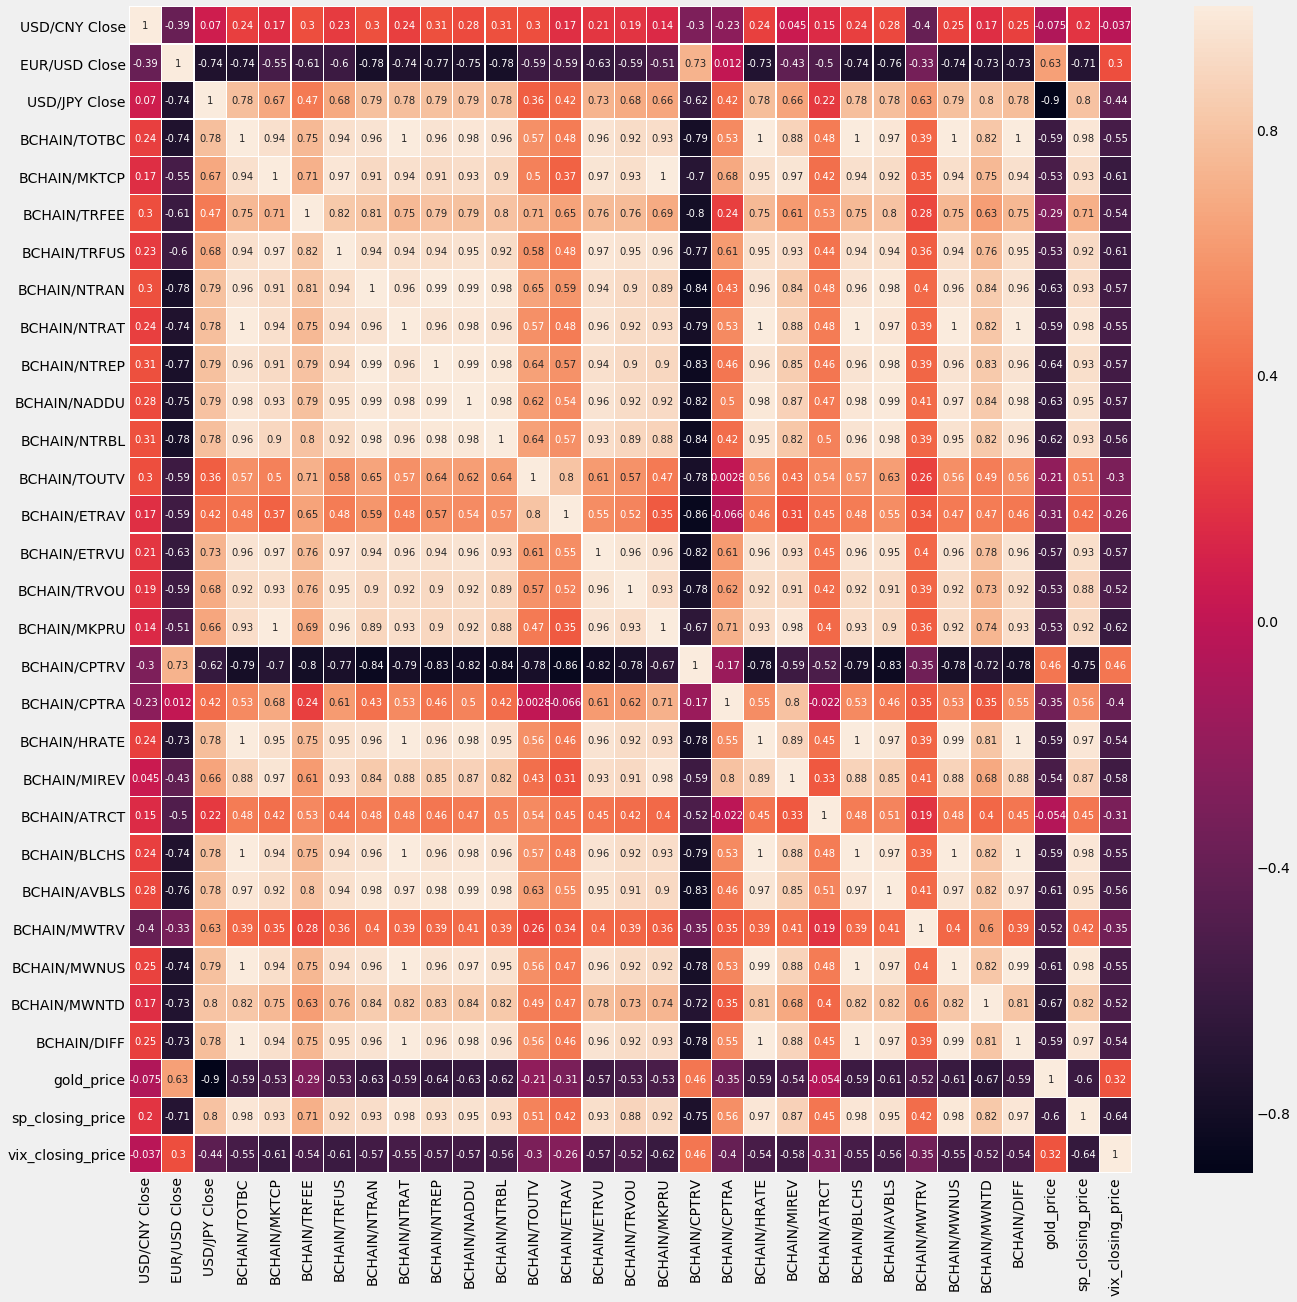

In [328]:
# Get correlation matrix of the meat DataFrame
btc_df_corr = btc_df.corr(method='spearman')


# Customize the heatmap of the corr_meat correlation matrix
fig, ax=plt.subplots(figsize=(20,20))
sns.heatmap(btc_df_corr,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10},
           ax=ax)

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [329]:
btc_vif=btc_df.drop(['BCHAIN/TOTBC',
       'BCHAIN/MKTCP', 'BCHAIN/NTRAN',
       'BCHAIN/NTRAT', 'BCHAIN/NTREP', 'BCHAIN/NADDU',  'BCHAIN/HRATE',
       'BCHAIN/MIREV',  'BCHAIN/BLCHS',  'BCHAIN/MWNUS'], axis=1)

In [330]:
X2 = btc_vif.drop('BCHAIN/MKPRU', axis=1).values
y2 = btc_vif['BCHAIN/MKPRU'].values

In [332]:
x_train,x_test,y_train,y_test = train_test_split(X2,y2,test_size = 0.3,random_state = 100)

In [334]:
X_train_2 = sma.add_constant(x_train) ## let's add an intercept (beta_0) to our model
X_test_2 = sma.add_constant(x_test) 

In [335]:
lm2 = sm.OLS(y_train,X_train_2).fit()
y_pred2=lm2.predict(X_test_2)
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4077.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        19:30:24   Log-Likelihood:                -15018.
No. Observations:                2009   AIC:                         3.008e+04
Df Residuals:                    1988   BIC:                         3.020e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -895.6816   1158.687     -0.773      0.440   -3168.050    1376.687
x1            80.9289    107.072      0.756      0.450    -129.056     290.914
x2          -915.3100    246.989     -3.706      0.000   -1399.695    -430.925
x3            -2.0191      3.281     -0.615      0.538      -8.453       4.415
x4            -2.0256      0.223     -9.089      0.000      -2.463      -1.589
x5             0.0003   2.01e-05     15.826      0.000       0.000       0.000
x6            -0.1392      0.067     -2.087      0.037      -0.270      -0.008
x7         -9.975e-06   4.74e-06     -2.105      0.035   -1.93e-05   -6.83e-07
x8         -8.859e-05   3.61e-05     -2.453      0.014      -0.000   -1.78e-05
x9          2.096e-06   4.85e-08     43.197      0.000       2e-06    2.19e-06
x10        -1.022e-08   6.54e-08     -0.156      0.876   -1.39e-07    1.18e-07
x11            5.1135      1.348      3.794      0.000       2.470       7.757
x12           29.5848      1.122     26.379      0.000      27.385      31.784
x13           -1.5982      3.347     -0.477      0.633      -8.162       4.966
x14          880.4706    144.883      6.077      0.000     596.332    1164.609
x15         1.736e-05   3.61e-05      0.481      0.630   -5.34e-05    8.81e-05
x16            0.0013      0.001      1.942      0.052   -1.28e-05       0.003
x17         8.795e-10   2.46e-11     35.818      0.000    8.31e-10    9.28e-10
x18            1.0506      0.145      7.234      0.000       0.766       1.335
x19           -0.0346      0.135     -0.257      0.797      -0.299       0.230
x20           -1.8062      2.750     -0.657      0.511      -7.200       3.587
==============================================================================
Omnibus:                      527.883   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24408.638
Skew:                           0.423   Prob(JB):                         0.00
Kurtosis:                      20.055   Cond. No.                     1.15e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

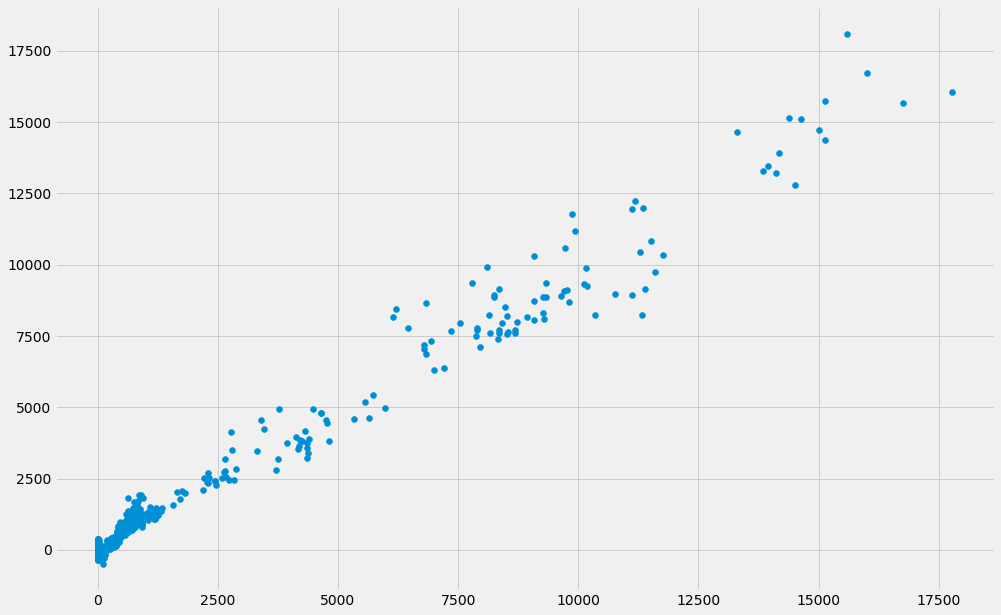

In [336]:
fig, ax=plt.subplots(figsize=(15,10))
plt.scatter(y_test, y_pred2)

In [340]:
len(btc_vif.columns)

21

In [341]:
vif2=[variance_inflation_factor(X_train_2, j) for j in range(X_train_2.shape[1])]
vif2 = pd.concat([pd.DataFrame(btc_vif.columns),pd.DataFrame(np.transpose(vif2))], axis = 1)
vif2

c:\users\getud\dropbox\dereje~1\nssds~1\test\venvtest\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,0,0
0,USD/CNY Close,0.000000
1,EUR/USD Close,6.992159
2,USD/JPY Close,8.779266
3,BCHAIN/TRFEE,26.347424
4,BCHAIN/TRFUS,7.402689
5,BCHAIN/NTRBL,8.397703
6,BCHAIN/TOUTV,22.871856
7,BCHAIN/ETRAV,1.254836
8,BCHAIN/ETRVU,1.165104
9,BCHAIN/TRVOU,9.447505


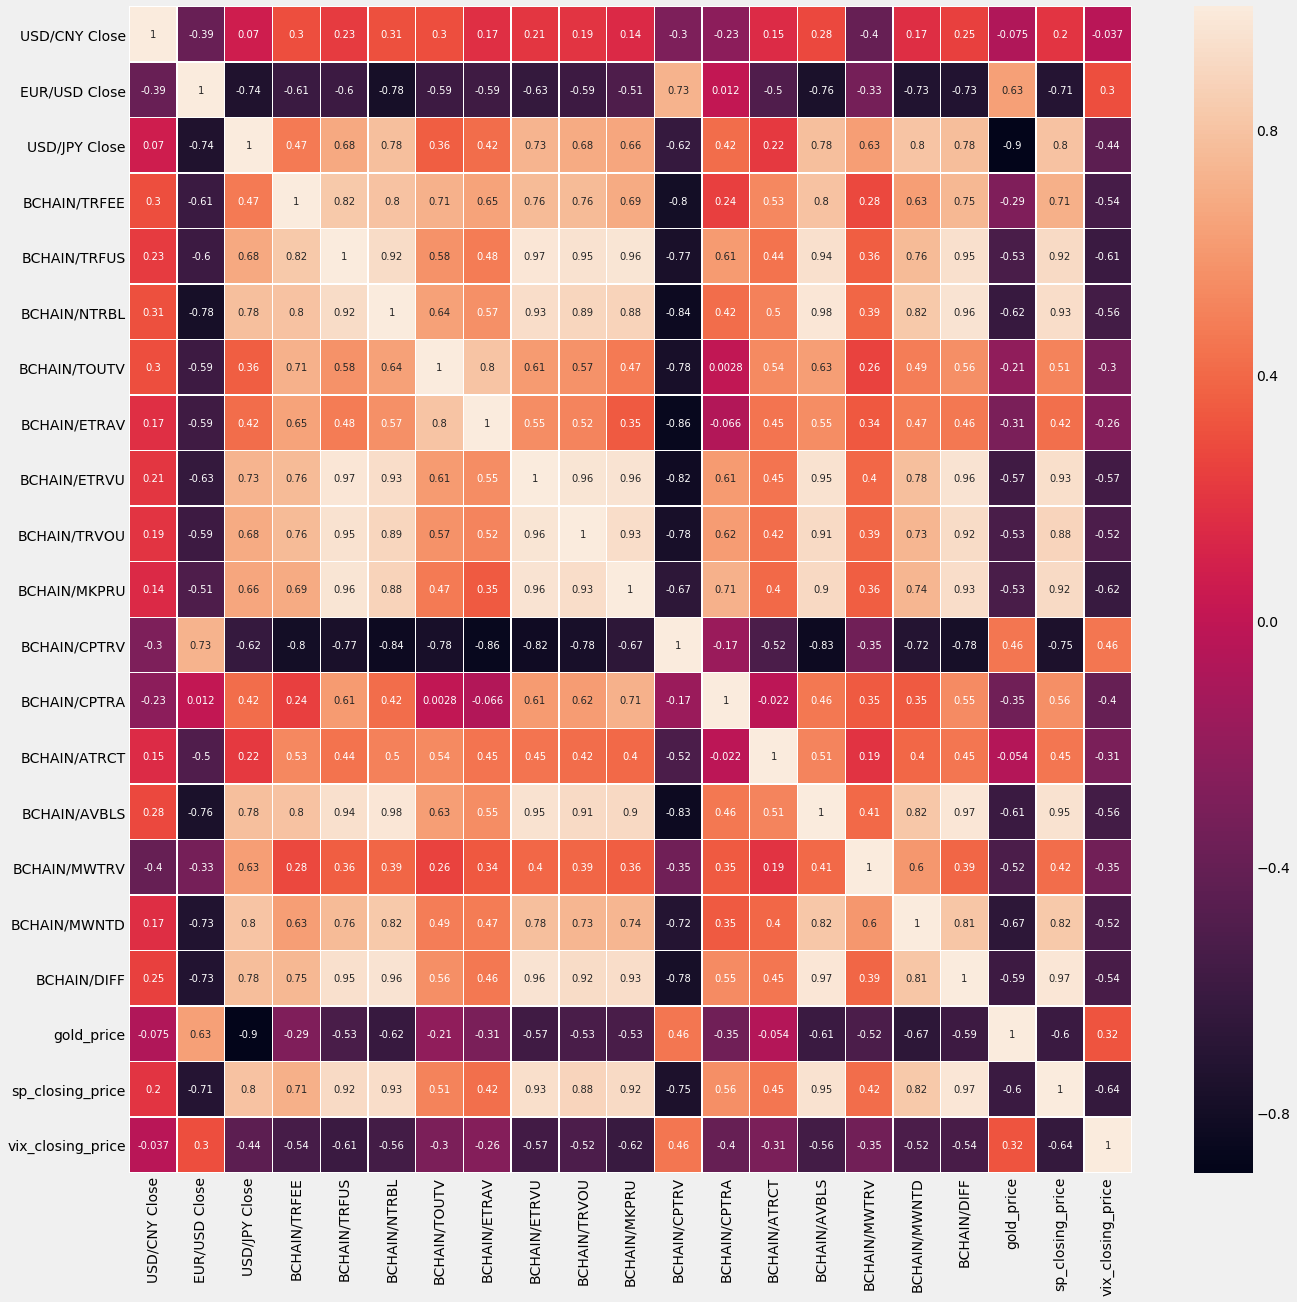

In [342]:
# Get correlation matrix of the meat DataFrame
btc_vif_corr = btc_vif.corr(method='spearman')


# Customize the heatmap of the corr_meat correlation matrix
fig, ax=plt.subplots(figsize=(20,20))
sns.heatmap(btc_vif_corr,
            annot=True,
            linewidths=0.4,
            annot_kws={"size": 10},
           ax=ax)

plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()